<a href="https://colab.research.google.com/github/Nour-7/2021-CS109A/blob/master/Decompose_of_Unitary_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decomposition of Unitary Matrices into Elementary Gates Using Qiskit
Decomposing a unitary matrix into elementary quantum gates is a fundamental task in quantum computing. Qiskit provides robust tools and methods to facilitate this decomposition. Below are the general steps followed by an application of these steps to a specific example.
General Steps for Decomposing a Unitary Matrix into Elementary Gates
Define the Unitary Matrix:
Ensure that the matrix is unitary, i.e.,
𝑈
†
𝑈
=
𝐼
U
†
 U=I, where
𝑈
†
U
†
  is the conjugate transpose of
𝑈
U and
𝐼
I is the identity matrix.
Choose a Decomposition Method:
Qiskit offers several decomposition methods such as:
KAK Decomposition: Suitable for two-qubit gates.
QR Decomposition: Applicable for larger systems.
Cosine-Sine Decomposition (CSD): Useful for more general cases.
Use Qiskit’s Decomposition Tools:
Utilize Qiskit libraries such as qiskit.quantum_info and qiskit.circuit to perform the decomposition.
Functions like quantum_info.OneQubitEulerDecomposer or qiskit.transpiler can be instrumental.
Construct the Quantum Circuit:
Translate the decomposed gates into a Qiskit QuantumCircuit.
Optimize the circuit for minimal gate count or depth if necessary.
Verify the Decomposition:
Compare the original unitary matrix with the matrix formed by the decomposed circuit to ensure accuracy.
Use fidelity measures or matrix norms for verification.
Simulate or Execute on Quantum Hardware:
Once verified, the circuit can be simulated using Qiskit’s simulators or executed on actual quantum hardware.
Example: Decomposing a Specific 6-Qubit Unitary Matrix
Let's apply the decomposition steps to a specific example. We have a 6-qubit state
∣
𝜓
⟩
∣ψ⟩ and its corresponding projector matrix
𝐷
=
2
∣
𝜓
⟩
⟨
𝜓
∣
−
𝐼
D=2∣ψ⟩⟨ψ∣−I.

In [ ]:
!pip install qiskit
!pip install -U qiskit-aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=8825bcb3fc9dcf71830cee32a292caceecb043203e6c5dfbdfee0d79cecbca19
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


## Step 1: Define the State Vector and Projector


In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import UnitarySynthesis
from qiskit.circuit.library import CXGate

In [ ]:
def define_projector():
    # Define |ψ> as a 6-qubit state vector
    # |ψ> = (1/sqrt(2)) * (|00 01 10> + |01 00 10>)

    # Define the computational basis states for |00 01 10> and |01 00 10>
    index_001010 = int('000110', 2)  # |00 01 10>
    index_010010 = int('010010', 2)  # |01 00 10>

    # Initialize |ψ> as a 64-dimensional vector (for 6 qubits)
    psi = np.zeros(64, dtype=complex)

    # Set |ψ> = (1/sqrt(2)) * (|00 01 10> + |01 00 10>)
    psi[index_001010] = 1 / np.sqrt(2)
    psi[index_010010] = 1 / np.sqrt(2)

    # Compute the projector |ψ><ψ|
    projector = np.outer(psi, psi.conj())

    # Calculate D = ψ><ψ| - I
    I = np.eye(64)
    D = 2 * projector - I

    return D

In [ ]:
# prompt: Print the matrix in an elegent way and show all ineries

import numpy as np

def print_matrix_nicely(matrix):
    rows, cols = matrix.shape
    max_len = max(len(str(matrix[i,j])) for i in range(rows) for j in range(cols))
    for i in range(rows):
      row_str = ""
      for j in range(cols):
        row_str += str(matrix[i, j]).ljust(max_len + 2)  # Add some spacing
      print(row_str)

# Example usage (assuming 'D' matrix is already defined from the previous code)
D = define_projector()
print_matrix_nicely(D)

(-1+0j)                      0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j                           0j            

## Step 2: Verify Unitarity of Matrix


In [ ]:
def is_unitary(matrix):
    return np.allclose(matrix.conj().T @ matrix, np.eye(matrix.shape[0]))

def verify_unitarity():
    D = define_projector()
    unitary = is_unitary(D)
    print(f"Is matrix D unitary? {unitary}")

if __name__ == "__main__":
    verify_unitarity()

Is matrix D unitary? True


## Step 3: Decompose the Unitary Matrix into Elementary Gates
[link text](https://)

In [ ]:
from qiskit.transpiler.passes.synthesis.plugin import unitary_synthesis_plugin_names

# Get the list of available unitary synthesis plugins
available_plugins = unitary_synthesis_plugin_names()
print("Available unitary synthesis methods:", available_plugins)


Available unitary synthesis methods: ['aqc', 'default', 'sk']


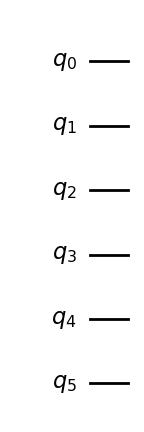

In [ ]:
def decompose_unitary():
    D = define_projector()

    # Ensure D is unitary
    if not np.allclose(D.conj().T @ D, np.eye(D.shape[0])):
        raise ValueError("Matrix D is not unitary.")

    # Convert the numpy matrix to a Qiskit Operator
    unitary_operator = Operator(D)

    # Initialize an empty QuantumCircuit with 6 qubits
    qc = QuantumCircuit(6)

    # Use the synthesis pass to decompose the unitary
    synthesis_pass = UnitarySynthesis(method='aqc')
    pass_manager = PassManager(synthesis_pass)
    optimized_circuit = pass_manager.run(qc, Operator(D))

    return optimized_circuit

circuit = decompose_unitary()
circuit.draw('mpl')


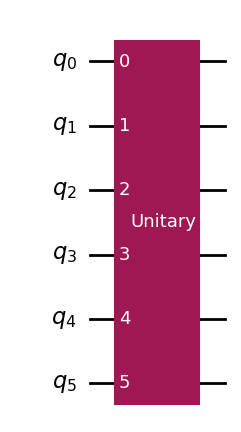

In [ ]:
D = define_projector()

# Ensure D is unitary
if not np.allclose(D.conj().T @ D, np.eye(D.shape[0])):
    raise ValueError("Matrix D is not unitary.")

# Initialize an empty QuantumCircuit with 6 qubits
qc = QuantumCircuit(6)

qc.unitary(D, qc.qubits)


qc.draw('mpl')
